In [13]:
import seaborn as sns
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
## Init wandb

In [2]:
api = wandb.Api()

In [3]:
entity, project= "ece517", "lunar-lander"
runs = api.runs(f'{entity}/{project}')

In [4]:
summary_list, config_list, name_list = [], [], []
run_data_df_list = []

for run in runs:
    group = run.group
    summary_list.append(run.summary._json_dict)

    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})
    run_data_df = run.history()
    run_data_df['group'] = group
    for k,v in config_list[-1].items():
        if type(v) != dict:
            run_data_df[k] = v
    run_data_df_list.append(run_data_df)

    name_list.append(run.name)


In [5]:
runs_df = pd.concat(run_data_df_list)
runs_df = runs_df.replace({
    'group': {
        'ppo_ex': 'PPO',
        'ppo_1': 'PPO-Shared',

    }
})
runs_df['model'] = runs_df['group']
runs_df = runs_df.drop(columns=['group'])

In [6]:
runs_df

,trainer/global_step,avg_ep_len,avg_reward,_step,loss_actor,_runtime,loss_critic,epoch,avg_ep_reward,_timestamp,...,gamma,lr_actor,lr_critic,batch_size,clip_ratio,hidden_size,nb_optim_iters,max_episode_len,steps_per_epoch,model
0,1,45.113640,-0.978103,0,-0.000783,8.082987,11961.408631,0,-90.671122,1.670865e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
1,3,97.639946,-1.778755,1,-0.001193,11.997478,10224.768935,1,-176.737404,1.670865e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
2,5,104.447342,-1.612954,2,-0.000207,15.916162,9446.693493,2,-170.945928,1.670865e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
3,7,100.871063,-1.828757,3,-0.000065,19.923458,13026.926240,3,-186.580858,1.670865e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
4,9,97.497612,-2.183507,4,-0.000768,23.768390,17291.214215,4,-215.539496,1.670865e+09,...,0.99,0.0003,0.001,1024,0.2,64.0,5,500,2048,PPO-Shared
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,291,442.875000,0.115502,145,-0.000041,304.327494,774.834871,145,37.271426,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
146,293,478.375000,0.081671,146,-0.000406,307.662335,671.954563,146,31.372478,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
147,295,465.875000,0.037825,147,-0.000659,311.072345,776.102663,147,16.147491,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO
148,297,471.000000,0.018673,148,-0.002270,314.457304,187.171633,148,8.026029,1.670861e+09,...,0.99,0.0003,0.001,1024,0.2,NaN,5,500,2048,PPO


---
# Plots

In [42]:
def plot_data(var, title=None):
    sns.set_theme(style="whitegrid")
    # sns.color_palette("nipy_spectral_r")
    #'seismic_r'
    sns.set_context("paper")
    plot = sns.lineplot(x="epoch", y=var,
                        hue="model",
                        data=runs_df, palette='seismic_r')
    if title is not None:
        plot.set(title=title)
    plt.tight_layout()
    plt.savefig(f'{project}-{var}.png')

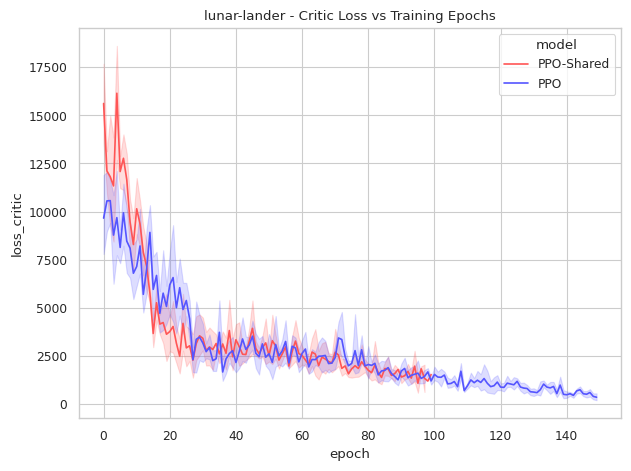

In [43]:
plot_data('loss_critic', title=f"{project} - Critic Loss vs Training Epochs")


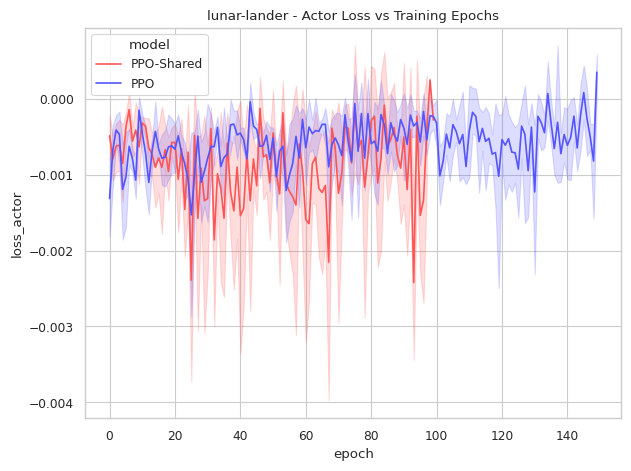

In [44]:
plot_data('loss_actor', title=f"{project} - Actor Loss vs Training Epochs")


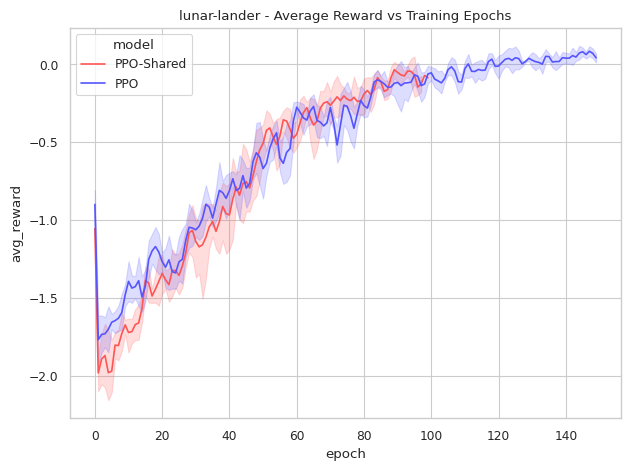

In [45]:
plot_data('avg_reward', title=f"{project} - Average Reward vs Training Epochs")


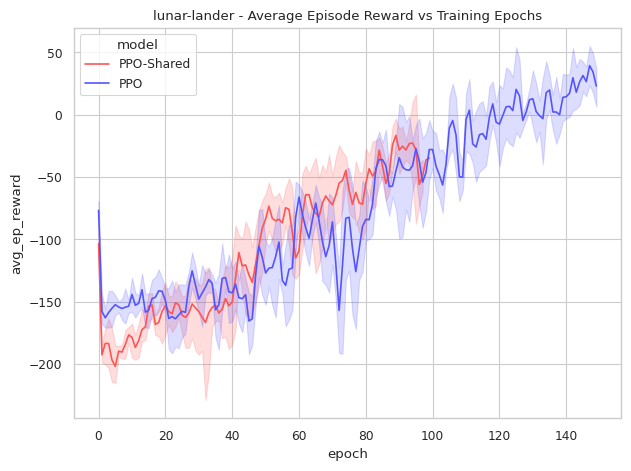

In [46]:
plot_data('avg_ep_reward', title=f"{project} - Average Episode Reward vs Training Epochs")


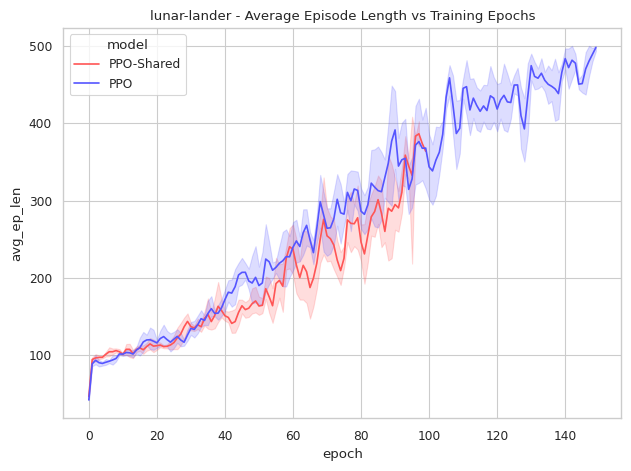

In [47]:
plot_data('avg_ep_len', title=f"{project} - Average Episode Length vs Training Epochs")
